# NumPy Basics


Numerical Python (NumPy) is a successor to the Numeric package. It was originally written by Travis Oliphant to be the foundation of a scientific computing environment in Python. It branched off from the much wider SciPy module in early 2005 and had its first stable release in mid-2006. Since then, it has enjoyed growing popularity among Pythonists who work in the mathematics, science, and engineering fields. The goal of this book is to make you conversant enough with NumPy so that you're able to use it and can build complex scientific applications with it.

NumPy provides a simple yet powerful data structure: the **n-dimensional array**. This is the foundation on which almost all the power of Python’s data science toolkit is built, and learning NumPy is the first step on any Python data scientist’s journey. This tutorial will provide you with the knowledge you need to use NumPy and the higher-level libraries that rely on it.

**In this tutorial you’ll learn:**

- What **core concepts** in data science are made possible by NumPy
- How to create **NumPy arrays** using various methods
- How to manipulate NumPy arrays to perform **useful calculations**
- How to apply these new skills to **real-world problems**

To get the most out of this NumPy tutorial, you should be familiar with writing Python code. If you’re familiar with matrix mathematics, then that will certainly be helpful as well. You don’t need to know anything about data science, however. You’ll learn that here.

## Choosing NumPy: The Benefits

Since you already know Python, you may be asking yourself if you really have to learn a whole new paradigm to do data science. Python’s for loops are awesome! Reading and writing CSV files can be done with traditional code. However, there are some convincing arguments for learning a new paradigm.

Here are the top four benefits that NumPy can bring to your code:

1. **More speed:** NumPy uses algorithms written in C that complete in nanoseconds rather than seconds.
2. **Fewer loops:** NumPy helps you to reduce loops and keep from getting tangled up in iteration indices.
3. **Clearer code:** Without loops, your code will look more like the equations you’re trying to calculate.
4. **Better quality:** There are thousands of contributors working to keep NumPy fast, friendly, and bug free.

Because of these benefits, NumPy is the de facto standard for multidimensional arrays in Python data science, and many of the most popular libraries are built on top of it. Learning NumPy is a great way to set down a solid foundation as you expand your knowledge into more specific areas of data science.

## Installing NumPy

It’s time to get everything set up so you can start learning how to work with NumPy. There are a few different ways to do this, and you can’t go wrong by following the instructions on the NumPy website. But there are some extra details to be aware of that are outlined below.

### Installing NumPy With Anaconda

The [Anaconda](https://www.anaconda.com/products/individual) distribution is a suite of common Python data science tools bundled around a package manager that helps manage your [virtual environments](https://realpython.com/python-virtual-environments-a-primer/) and project dependencies. It’s built around [conda](https://docs.conda.io/en/latest/), which is the actual package manager. This is the method recommended by the NumPy project, especially if you’re stepping into data science in Python without having already [set up a complex development environment](https://realpython.com/python-windows-machine-learning-setup/).

If you’ve already got a workflow you like that uses [`pip`](https://realpython.com/what-is-pip/), [Pipenv](https://realpython.com/pipenv-guide/), [Poetry](https://realpython.com/effective-python-environment/#poetry), or some other toolset, then it might be better not to add conda to the mix. The conda package repository is separate from [PyPI](https://pypi.org/), and `conda` itself sets up a separate little island of packages on your machine, so managing paths and remembering which package lives where can be a [nightmare](https://xkcd.com/1987/).

Once you’ve got conda installed, you can run the install command for the libraries you’ll need:

```bash
$ conda install numpy
```

This will install what you need for this NumPy tutorial, and you’ll be all set to go.

### Installing NumPy With `pip`

Although the NumPy project recommends using `conda` if you’re starting fresh, there’s nothing wrong with managing your environment yourself and just using good old `pip`, Pipenv, Poetry, or whatever other alternative to `pip` is your favorite.

Here are the commands to get set up with `pip`:

```bash
$ mkdir numpy-tutorial
$ cd numpy-tutorial
$ python3 -m venv .numpy-tutorial-venv
$ source .numpy-tutorial-venv/bin/activate

(.numpy-tutorial-venv)
$ pip install numpy
```

After this, make sure your virtual environment is activated, and all your code should run as expected.

## The Need for NumPy Arrays

A fundamental question that beginners ask is. Why are arrays necessary for scientific computing at all? Surely, one can perform complex mathematical operations on any abstract data type, such as a list. The answer lies in the numerous properties of arrays that make them significantly more useful. In this section, let's go over a few of these properties to emphasize why something such as the NumPy ndarray object exists at all.

### Representing of matrices and vectors
The abstract mathematical concepts of matrices and vectors are central to many scientific problems. Arrays provide a direct semantic link to these concepts. Indeed, whenever a piece of mathematical literature makes reference to a matrix, one can safely think of an array as the software abstraction that represents the matrix. In scientific literature, an expression such as $A_{ij}$ is typically used to denote the element in the $i^{th}$ row and $j^{th}$ column of array `A`. The corresponding expression in NumPy would simply be `A[i,j]`. For matrix operations, NumPy arrays also support **vectorization** (details are addressed later, Using NumPy Arrays), which speeds up execution greatly. Vectorization makes the code more concise, easier to read, and much more akin to mathematical notation. Like matrices, arrays can be multidimensional too. Every element of an array is addressable through a set of integers called indices, and the process of accessing elements of an array with sets of integers is called **indexing**. This functionality can indeed be implemented without using arrays, but this would be cumbersome and quite unnecessary.

### Efficiency

Efficiency can mean a number of things in software. The term may be used to refer to the speed of execution of a program, its data retrieval and storage performance, its memory overhead (the memory consumed when a program is executing), or its overall throughput. NumPy arrays are better than most other data structures with respect to almost all of these characteristics (with a few exceptions such as pandas, DataFrames, or SciPy's sparse matrices, which we shall deal with later). Since NumPy arrays are statically typed and homogenous, fast mathematical operations can be implemented in compiled languages (the default implementation uses C and Fortran). Efficiency (the availability of fast algorithms working on homogeneous arrays) makes NumPy popular and important.

### Ease of development

The NumPy module is a powerhouse of off-the-shelf functionality for mathematical tasks. It adds greatly to Python's ease of development. The following is a brief summary of what the module contains, most of which we shall explore in this book. A far more detailed treatment of the NumPy module is in the definitive _Guide to NumPy, Travis Oliphat_. The NumPy API is so flexible that it has been adopted extensively by the scientific Python community as the standard API to build scientific applications. Examples of how this standard is applied across scientific disciplines can be found in _The NumPy Array: a structure for efficient numerical computation, Van Der Walt_, and others:

|Submodule | Contents|
|:--|:--|
|`numpy.core` | Basic objects|
|`lib` | Additional utilities|
|`linalg` | Basic linear algebra|
|`fft` | Discrete Fourier transforms|
|`random` | Random number generators|
|`distutils` | Enhanced build and distribution|
|`testing` | Unit testing|
|`f2py` | Automatic wrapping of the Fortran code|

## Array Objects

NumPy provides an N-dimensional array type, the `ndarray`, which describes a collection of “items” of the same type. The items can be indexed using for example N integers.

All ndarrays are homogeneous: every item takes up the same size block of memory, and all blocks are interpreted in exactly the same way. How each item in the array is to be interpreted is specified by a separate data-type object, one of which is associated with every array. In addition to basic types (integers, floats, etc.), the data type objects can also represent data structures.

An item extracted from an array, e.g., by indexing, is represented by a Python object whose type is one of the array scalar types built in NumPy. The array scalars allow easy manipulation of also more complicated arrangements of data.

Below is the conceptual diagram showing the relationship between the three fundamental objects used to describe the data in an array:
- 1) the ndarray itself.
- 2) the data-type object that describes the layout of a single fixed-size element of the array.
- 3) the array-scalar Python object that is returned when a single element of the array is accessed.

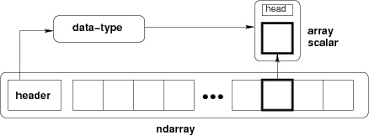

## The N-dimensional Array (`ndarray`)

An `ndarray` is a (usually fixed-size) multidimensional container of items of the same type and size. The number of dimensions and items in an array is defined by its `shape`, which is a `tuple` of N non-negative integers that specify the sizes of each dimension. The type of items in the array is specified by a separate data-type object (`dtype`), one of which is associated with each ndarray.

As with other container objects in Python, the contents of an ndarray can be accessed and modified by indexing or slicing the array (using, for example, N integers), and via the methods and attributes of the ndarray.

Different ndarrays can share the same data, so that changes made in one ndarray may be visible in another. That is, an ndarray can be a “view” to another ndarray, and the data it is referring to is taken care of by the “base” ndarray. 

### Creating Arrays

#### Creating Arrays from List

The simplest way to create an array is using the `array` function. To create a valid array object, arguments to array functions need to adhere to at least one of the following conditions:

- It has to be a valid iterable value or sequence, which may be nested
- It must have an `__array__` method that returns a valid numpy array

A 2-dimensional array of size 2 x 3, composed of 4-byte integer elements:

In [4]:
import numpy as np

In [8]:
x = np.array([[1, 2, 3], [4, 5, 6]])

In [9]:
type(x)

numpy.ndarray

In [10]:
x.shape

(2, 3)

In [11]:
x.dtype

dtype('int64')

In [12]:
np.array(['hello', 'world', 3])

array(['hello', 'world', '3'], dtype='<U21')

The first condition is always true for Python lists and tuples. When creating an array from lists or tuples, the input may consist of different (heterogeneous) data types. The array function, however, will normally cast all input elements into the most suitable data type required for the array. For example, if a list contains both floats and integers, the resulting array will be of type float. If it contains an integer and a boolean, the resulting array will consist of integers.

One of the most handy ways of creating lists, and therefore arrays, of integers is using the `range` funct/ion:

In [30]:
x = range(5)

In [31]:
y = np.array(x)

NumPy has a convenient function, called arange, that combines the functionality of the `range` and `array` functions. The preceding two lines of code are equivalent to this:

In [20]:
x = np.arange(10)

In [21]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Creating random arrays

The `random` module in NumPy provides various functions to create random arrays of any data type. We will be using this module very frequently throughout the book to demonstrate the working of functions in NumPy. The random module broadly consists of functions that:
- Create random arrays
- Create random permutations of arrays
- Generate arrays with specific probability distributions

For the purposes of this section, we will be focusing on two important functions in the random module-`rand` and `random`.

### Generate Random Integer in NumPy

The `randint` function takes three arguments, of which two are optional. The first argument denotes the desired lower limit of the output values, and the second optional argument denotes the (exclusive) upper limit of the output values. The optional `size` argument is a tuple that determines the shape of the output array.

In [3]:
import numpy as np
# generate random integer from 0 to 9
random_number = np.random.randint(0, 10)
print(random_number)

3


In [28]:
LOW, HIGH = 1, 11 
SIZE = 10
x = np.random.randint(LOW, HIGH, size=SIZE) 

In [29]:
x

array([10,  5, 10,  9,  1,  6,  4,  7,  3,  9])

### Generate Random Float in NumPy

In [5]:
import numpy as np

random_number = np.random.rand()

print(random_number)

0.7900198522532561


### Generate Random Array in NumPy

In [32]:
import numpy as np

# generate 1D array of 5 random integers between 0 and 9
integer_array = np.random.randint(0, 10, 5)

print("1D Random Integer Array:\n",integer_array)

# generate 1D array of 5 random numbers between 0 and 1
float_array = np.random.rand(5)

print("\n1D Random Float Array:\n",float_array)

# generate 2D array of shape (3, 4) with random integers
result = np.random.randint(0, 10, (3,4))

print("\n2D Random Integer Array:\n",result)

1D Random Integer Array:
 [4 1 9 7 3]

1D Random Float Array:
 [0.87962312 0.66424386 0.9166034  0.01845254 0.33201313]

2D Random Integer Array:
 [[1 5 1 5]
 [3 1 8 4]
 [9 9 8 6]]


### Choose Random Number from NumPy Array

In [9]:
import numpy as np

# create an array of integers from 1 to 5
array1 = np.array([1, 2, 3, 4, 5])

# choose a random number from array1
random_choice = np.random.choice(array1)

print(random_choice)


3


### Choose Random Number from NumPy Array

In [16]:
np.random.choice([1,2,3,4,5],(3,4), replace=True, p=None)

array([[5, 4, 2, 3],
       [2, 5, 2, 4],
       [4, 4, 3, 1]])

In [21]:
np.random.choice(5, 3, p=[0.8, 0, 0.1, 0.1, 0])

array([0, 0, 0])

#### Other arrays

There are a few other array creation functions, such as `zeros()`, `ones()`, `eye()`, and others (similar to the ones in MATLAB) that can be used to create NumPy arrays. Their use is fairly straightforward.

In [94]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [95]:
np.ones((3, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [98]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [107]:
np.eye(3, 4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [108]:
np.eye(3, 4, 2)

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

## Array Data Types

Data types are another important intrinsic aspect of a NumPy array alongside its memory layout and indexing (Will be discussed later). The data type of a NumPy array can be found by simply checking the `dtype` attribute of the array. Try out the following examples to check the data types of different arrays:

In [109]:
x = np.random.random((10, 10)) 

In [111]:
x.dtype

dtype('float64')

In [112]:
x = np.array(range(10)) 

In [113]:
x.dtype

dtype('int64')

In [114]:
x = np.array(['hello', 'world']) 

In [116]:
x.dtype

dtype('<U5')

Many array creation functions provide a default array data type. For example, the `np.zeros` and `np.ones` functions create arrays that are full of floats by default. But it is possible to make them create arrays of other data types too. Consider the following examples that demonstrate how to use the dtype argument to create arrays of arbitrary data types.

In [121]:
x = np.ones((3, 3), dtype=int) 

In [122]:
x.dtype

dtype('int64')

In [123]:
x = np.zeros((3, 3), dtype='i')

In [124]:
x

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [125]:
x.dtype

dtype('int32')

For a complete list of data types supported by NumPy, refer to https://numpy.org/doc/stable/user/basics.types.html.

## Hello NumPy: Curving Test Grades Tutorial

This first example introduces a few core concepts in NumPy that you’ll use throughout the rest of the tutorial:

- Creating arrays using `numpy.array()`
- Treating complete arrays like individual values to make vectorized calculations more readable
- Using built-in NumPy functions to modify and aggregate the data


These concepts are the core of using NumPy effectively.

The scenario is this: You’re a teacher who has just graded your students on a recent test. Unfortunately, you may have made the test too challenging, and most of the students did worse than expected. To help everybody out, you’re going to **curve** everyone’s grades.

It’ll be a relatively rudimentary curve, though. You’ll take whatever the average score is and declare that a C. Additionally, you’ll make sure that the curve doesn’t accidentally hurt your students’ grades or help so much that the student does better than 100%.

Enter this code into your REPL:

In [126]:
import numpy as np

CURVE_CENTER = 80
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12])

def curve(grades):
    average = grades.mean()
    change = CURVE_CENTER - average
    new_grades = grades + change
    
    return np.clip(new_grades, grades, 100)

curve(grades)

array([ 91.25,  54.25,  83.25, 100.  ,  70.25, 100.  ,  93.25,  31.25])

The original scores have been increased based on where they were in the pack, but none of them were pushed over 100%.

Here are the important highlights:

- **Line 1** imports NumPy using the `np` alias, which is a common convention that saves you a few keystrokes.
- **Line 3** creates your first NumPy array, which is one-dimensional and has a shape of `(8,)` and a data type of `int64`. Don’t worry too much about these details yet. You’ll explore them in more detail later.
- **Line 5** takes the average of all the scores using [`.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html#numpy.ndarray.mean). Arrays have a lot of [methods](https://numpy.org/doc/stable/reference/arrays.ndarray.html#array-methods).

On line 7, you take advantage of two important concepts at once:

- Vectorization
- Broadcasting

**Vectorization** is the process of performing the same operation in the same way for each element in an array. This removes `for` loops from your code but achieves the same result.

**Broadcasting** is the process of extending two arrays of different shapes and figuring out how to perform a vectorized calculation between them. Remember, grades is an array of numbers of shape `(8,)` and change is a **scalar**, or single number, essentially with shape `(1,)`. In this case, NumPy adds the scalar to each item in the array and returns a new array with the results.

Finally, on line 8, you limit, or **clip**, the values to a set of minimums and maximums. In addition to array methods, NumPy also has a large number of built-in functions. You don’t need to memorize them all—that’s what documentation is for. Anytime you get stuck or feel like there should be an easier way to do something, take a peek at the documentation and see if there isn’t already a routine that does exactly what you need.

In this case, you need a function that takes an array and makes sure the values don’t exceed a given minimum or maximum. [`clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) does exactly that.

## Vectorized Operations

**All NumPy operations are vectorized,** where you apply operations to the whole array instead of on each element individually. This is not just neat and handy but also improves the performance of computation compared to using loops. In this section, we will experience the power of NumPy vectorized operations. A key idea worth keeping in mind before we start exploring this subject is to always think of entire sets of arrays instead of each element; this will help you enjoy learning about NumPy Arrays and their performance. Let's start by doing some simple calculations with scalars and between NumPy Arrays:

In [5]:
x = np.array([1, 2, 3, 4])

In [6]:
x + 2

array([3, 4, 5, 6])

As mentioned, all the elements in the array are added by 1 simultaneously. This is very different from Python or most other programming languages. The elements in a NumPy Array all have the same `dtype`; in the preceding example, this is `numpy.int` (this is either 32 or 64-bit depending on the machine); therefore, NumPy can save time on checking the type of each element at runtime, which, ordinarily, is done by Python. So, just apply these arithmetic operations:

In [7]:
y = np.array([-1, 2, 3, 0]) 

In [8]:
x * y

array([-1,  4,  9,  0])

Two NumPy Arrays are multiplied element by element. In the preceding example, two arrays are of equal shape, so no broadcasting is applied here (we will explain different shapes, NumPy Array operations, and broadcasting rules in a later section.) The first element in array `x` is multiplied by the first element in array `y` and so on. One important point to note here is that the arithmetic operations between two NumPy Arrays are not matrix multiplications. The result still returns the same shape of NumPy Arrays. A matrix multiplication in NumPy will use `numpy.dot()` or `@` operator. Take a look at this example:

In [9]:
np.dot(x, y)

12

In [148]:
x @ y

12

NumPy also supports logic comparison between two arrays, and the comparison is vectorized as well. The result returns a Boolean, and NumPy Array indicates which element in both arrays is equal. If two different shapes of arrays are compared, the result would only return one `False`, which indicates that the two arrays are different, and would really compare each element:

In [149]:
x == y

array([False,  True,  True, False])

From the preceding examples, we get an insight into NumPy's element-wise operations, but what's the benefit of using them? How can we know that an optimization has been made through these NumPy operations? We will use the `%timeit` to show you the difference between NumPy operations and the Python `for` loop:

In [150]:
x = np.arange(1000)

In [152]:
%timeit x + 1

802 ns ± 8.25 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [153]:
y = range(1000)

In [155]:
%timeit [i+1 for i in y]

32.1 µs ± 341 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Two variables, `x` and `y`, are the same length and do the same kind of work, which includes adding a value to all the elements in the arrays. With the help of NumPy operations, the performance is way faster than an ordinary Python `for` loop (we use a list comprehension here for neat code, which is faster than an ordinary Python `for` loop, but still, NumPy has better performance when compared to the ordinary Python `for` loop). Knowing this huge distinction can help you speed up your code by replacing your loops with NumPy operations.

As we mentioned in the previous examples, improvement in performance is due to a consistent `dtype` in a NumPy Array. A tip that can help you use NumPy Arrays correctly is to always consider `dtype` before you apply any operation, as you will most likely be doing in most programming languages.